# Implementation von annotation_example2.txt

In [1]:
import math
import numpy as np
import random as rd
import pandas as pd
from scipy import stats 

import matplotlib.pyplot as plt
import matplotlib as mat
import holoviews as hv

import vaex as vaex
import vaex.jupyter.model as vjm

import seaborn as sns

import time


## Die Daten werden hier eingelesen.
###### Mit Übergabe als <class 'vaex.dataframe.DataFrameArrays'> mit Ausgabe der dafür benötigten Zeit

Hier wurde die Datei über Vaex importiert und beim back_value gab es eine kleine Nachbereitung im Namen, da scheinbar mit dem Namen aus der letzten Spalte es zu Komplikationen kommt und das unabhängig davon dass wir hier Vaex verwenden, dies war nämlich auch beim Importieren mit Pandas auch so.

In [2]:
start_proc = time.process_time()

df = vaex.from_csv(
    '/Users/samel/Documents/Hochschule/aktuelles Semester/03. Projekt zur Datenanalyse/Datein/annotation_example2.txt',
    sep=";",
    header=0
    )

df.rename(df.get_column_names()[6], 'backvalue')

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc),'\n\nDie Länge des Datensatzes beträgt:', len(df))

df


/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Benötigte Systemzeit: 6.571s 

Die Länge des Datensatzes beträgt: 4073472


#,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,1BSP201640728,'1BSP24164HL',1,'2013-02-01 06:02','s',65.05,50.57
1,1BSP201640729,'1BSP24164HL',1,'2013-02-01 06:02','s',80.39,120.1
2,1BSP201640730,'1BSP24164HL',1,'2013-02-01 06:02','s',98.83,97.27
3,1BSP201640731,'1BSP24164HL',1,'2013-02-01 06:02','s',119.92,124.45
4,1BSP201640732,'1BSP24164HL',1,'2013-02-01 06:02','s',94.73,81.88
...,...,...,...,...,...,...,...
"4,073,467",1BSP800061435,'1BSP85006HH',98,'2013-02-05 11:02','s',108.0,86.16
"4,073,468",1BSP800061436,'1BSP85006HH',98,'2013-02-05 11:02','s',99.36,80.8
"4,073,469",1BSP800061437,'1BSP85006HH',98,'2013-02-05 11:02','s',78.83,58.85
"4,073,470",1BSP800061438,'1BSP85006HH',98,'2013-02-05 11:02','s',122.61,104.87


## Hier sollen die Dateien in Kategorien aufgeteilt werden
##### Nebenbei werden die Dateien mit den Variablen in 'df_zahl_ohne_f' übergeben, die die Datei ohne die Werte der Kategorie 'f' besteht und verwendet werden soll.

In [3]:
f = df[df['sign'] == 'f'] # f => failure (ein Problem mit einem der Geräte)

n = df[df['sign'] == 'n'] # n => neutral (nur Lösungsmittel, keine Substanz)

p = df[df['sign'] == 'p'] # p => positiv (kontrolle mit -max- Effekt, bzw. verschiede Konzentrationen -> DWK)

z = df[df['sign'] == 'z'] # z => zero (negative kontrolle, oder zweite kontrolle, ditto)

s = df[df['sign'] == 's'] # s => substanz (getestetes kleines chem. Molekül)

In [4]:
print('Länge des gesamten Datensatzes aus annotation_example2.txt:', len(df), '\n', '\n')
print('Länge der Kategorie f:', len(f), '\n')
print('Länge der Kategorie n:', len(n), '\n')
print('Länge der Kategorie p:', len(p), '\n')
print('Länge der Kategorie z:', len(z), '\n')
print('Länge der Kategorie s:', len(s), '\n')

print("Wobei wir die Kategorie 'f' vernachläsigen werden, da es sich hierbei um Gerätefehler handelt:")
print( len(df), '-' ,len(df[df.sign == 'f']), ' =', len(s) + len(z) + len(p) + len(n))


Länge des gesamten Datensatzes aus annotation_example2.txt: 4073472 
 

Länge der Kategorie f: 36776 

Länge der Kategorie n: 663033 

Länge der Kategorie p: 8329 

Länge der Kategorie z: 0 

Länge der Kategorie s: 3365334 

Wobei wir die Kategorie 'f' vernachläsigen werden, da es sich hierbei um Gerätefehler handelt:
4073472 - 36776  = 4036696


Hier werden Boplots geplottet.

In [5]:
datei = df.to_pandas_df(['pos_id', 'barcode', 'run_id', 'test_date', 'sign', 'value', 'backvalue'])
datei


,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,1BSP201640728,1BSP24164HL,1,2013-02-01 06:02,s,65.05,50.57
1,1BSP201640729,1BSP24164HL,1,2013-02-01 06:02,s,80.39,120.10
2,1BSP201640730,1BSP24164HL,1,2013-02-01 06:02,s,98.83,97.27
3,1BSP201640731,1BSP24164HL,1,2013-02-01 06:02,s,119.92,124.45
4,1BSP201640732,1BSP24164HL,1,2013-02-01 06:02,s,94.73,81.88
...,...,...,...,...,...,...,...
4073467,1BSP800061435,1BSP85006HH,98,2013-02-05 11:02,s,108.00,86.16
4073468,1BSP800061436,1BSP85006HH,98,2013-02-05 11:02,s,99.36,80.80
4073469,1BSP800061437,1BSP85006HH,98,2013-02-05 11:02,s,78.83,58.85
4073470,1BSP800061438,1BSP85006HH,98,2013-02-05 11:02,s,122.61,104.87


In [6]:
f = datei[ (datei['sign'] == 'f')].index

datei.drop(f, inplace=True)


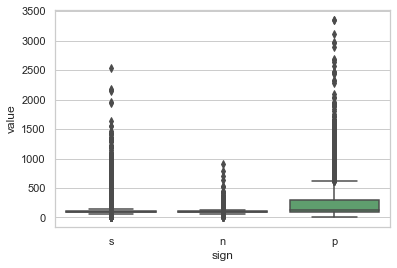

In [7]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="value", data=datei)

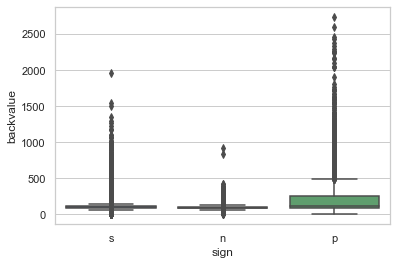

In [8]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="backvalue", data=datei)


## Inteervalle festlegen, um zukünftig Ausreißer entfernen zu können.
 
### Intervalsgrenzen bestimmen
Die Intervalle beziehen sich auf die jeweilige Kategorie (n, p, z, s).

In [9]:
print('Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:\n')

n_stdValue = n.std('value')
n_stdBackvalue = n.std('backvalue')
n_meanValue = n.mean('value')
n_meanBackvalue = n.mean('backvalue')

n_3_ValueGrenzen = ( n_meanValue - (3 * n_stdValue),
                    n_meanValue + (3 * n_stdValue) )

n_3_BackvalueGrenzen = ( n_meanBackvalue - (3 * n_stdBackvalue),
                        n_meanBackvalue + (3 * n_stdBackvalue) )

print('3std-n:', '\n', 'VALUE:', n_3_ValueGrenzen, 'BACK_VALUE:', n_3_BackvalueGrenzen, '\n')

n_5_ValueGrenzen = ( n_meanValue - (5 * n_stdValue),
                    n_meanValue + (5 * n_stdValue) )

n_5_BackvalueGrenzen = ( n_meanBackvalue - (5 * n_stdBackvalue),
                        n_meanBackvalue + (5 * n_stdBackvalue) )

print('5std-n:', '\n', 'VALUE:', n_5_ValueGrenzen, 'BACK_VALUE:', n_5_BackvalueGrenzen, '\n', '\n', '\n')




p_stdValue = p.std('value')
p_stdBackvalue = p.std('backvalue')
p_meanValue = p.mean('value')
p_meanBackvalue = p.mean('backvalue')

p_3_ValueGrenzen = (p_meanValue - (3 * p_stdValue),
                    p_meanValue + (3 * p_stdValue) )

p_3_BackvalueGrenzen = (p_meanBackvalue - (3 * p_stdBackvalue),
                        p_meanBackvalue + (3 * p_stdBackvalue) )

print('3std-p:', '\n', 'VALUE:', p_3_ValueGrenzen, 'BACK_VALUE:', p_3_BackvalueGrenzen, '\n')

p_5_ValueGrenzen = (p_meanValue - (5 * p_stdValue),
                    p_meanValue + (5 * p_stdValue) )

p_5_BackvalueGrenzen = (p_meanBackvalue - (5 * p_stdBackvalue),
                        p_meanBackvalue + (5 * p_stdBackvalue) )

print('5std-p:', '\n', 'VALUE:', p_5_ValueGrenzen, 'BACK_VALUE:', p_5_BackvalueGrenzen, '\n', '\n', '\n')




z_stdValue = z.std('value')
z_stdBackvalue = z.std('backvalue')
z_meanValue = z.mean('value')
z_meanBackvalue = z.mean('backvalue')

z_3_ValueGrenzen = ( z_meanValue - (3 * z_stdValue),
                    z_meanValue + (3 * z_stdValue) )

z_3_BackvalueGrenzen = ( z_meanBackvalue - (3 * z_stdBackvalue),
                        z_meanBackvalue + (3 * z_stdBackvalue) )

print('3std-z:', '\n', 'VALUE:', z_3_ValueGrenzen, 'BACK_VALUE:', z_3_BackvalueGrenzen, '\n')

z_5_ValueGrenzen = ( z_meanValue - (5 * z_stdValue),
                    z_meanValue + (5 * z_stdValue) )

z_5_BackvalueGrenzen = ( z_meanBackvalue - (5 * z_stdBackvalue),
                        z_meanBackvalue + (5 * z_stdBackvalue) )

print('5std-z:', '\n', 'VALUE:', z_5_ValueGrenzen, 'BACK_VALUE:', z_5_BackvalueGrenzen, '\n', '\n', '\n')




s_stdValue = s.std('value')
s_stdBackvalue = s.std('backvalue')
s_meanValue = s.mean('value')
s_meanBackvalue = s.mean('backvalue')

s_3_ValueGrenzen = ( s_meanValue - (3 * s_stdValue),
                    s_meanValue + (3 * s_stdValue) )

s_3_BackvalueGrenzen = ( s_meanBackvalue - (3 * s_stdBackvalue),
                        s_meanBackvalue + (3 * s_stdBackvalue) )

print('3std-s:', '\n', 'VALUE:', s_3_ValueGrenzen, 'BACK_VALUE:', s_3_BackvalueGrenzen, '\n')

s_5_ValueGrenzen = ( s_meanValue - (5 * s_stdValue),
                    s_meanValue + (5 * s_stdValue) )

s_5_BackvalueGrenzen = ( s_meanBackvalue - (5 * s_stdBackvalue),
                        s_meanBackvalue + (5 * s_stdBackvalue) )

print('5std-s:', '\n', 'VALUE:', s_5_ValueGrenzen, 'BACK_VALUE:', s_5_BackvalueGrenzen, '\n')


Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:

3std-n: 
 VALUE: (48.745788022559566, 144.72941369439732) BACK_VALUE: (41.716735826959166, 151.5053056098929) 

5std-n: 
 VALUE: (16.751246131946985, 176.7239555850099) BACK_VALUE: (5.120545899314578, 188.1014955375375) 
 
 

3std-p: 
 VALUE: (-571.7801849103096, 1045.9920951036102) BACK_VALUE: (-433.2079088883513, 844.3022251327984) 

5std-p: 
 VALUE: (-1111.037611581616, 1585.2495217749167) BACK_VALUE: (-859.0446202287345, 1270.1389364731817) 
 
 

3std-z: 
 VALUE: (nan, nan) BACK_VALUE: (nan, nan) 

5std-z: 
 VALUE: (nan, nan) BACK_VALUE: (nan, nan) 
 
 

3std-s: 
 VALUE: (40.49078980555373, 162.49856104045412) BACK_VALUE: (32.59381037474573, 171.1283115661953) 

5std-s: 
 VALUE: (-0.17846727274638852, 203.16781811875424) BACK_VALUE: (-13.584356689070788, 217.30647863001178) 



Entsprechend der Grenzen Bereinigen

In [10]:
print('+-(3std)')
n_3_cleaned = n[(n['value'] <= n_3_ValueGrenzen[1] )
              & (n['value'] >= n_3_ValueGrenzen[0] )
              & (n['backvalue'] <= n_3_BackvalueGrenzen[1] )
              & (n['backvalue'] >= n_3_BackvalueGrenzen[0] )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_3_cleaned), '\n')


p_3_cleaned = p[(p['value'] <= p_3_ValueGrenzen[1] )
              & (p['value'] >= p_3_ValueGrenzen[0] )
              & (p['backvalue'] <= p_3_BackvalueGrenzen[1] )
              & (p['backvalue'] >= p_3_BackvalueGrenzen[0] )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_3_cleaned), '\n')


z_3_cleaned = z[(z['value'] <= z_3_ValueGrenzen[1] )
              & (z['value'] >= z_3_ValueGrenzen[0] )
              & (z['backvalue'] <= z_3_BackvalueGrenzen[1] )
              & (z['backvalue'] >= z_3_BackvalueGrenzen[0] )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_3_cleaned), '\n')


s_3_cleaned = s[(s['value'] <= s_3_ValueGrenzen[1] )
              & (s['value'] >= s_3_ValueGrenzen[0] )
              & (s['backvalue'] <= s_3_BackvalueGrenzen[1] )
              & (s['backvalue'] >= s_3_BackvalueGrenzen[0] )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_3_cleaned), '\n\n')

df_3_cleaned = n_3_cleaned.concat(p_3_cleaned)
#df_cleaned = df_cleaned.concat(z_cleaned)
df_3_cleaned = df_3_cleaned.concat(s_3_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_3_cleaned),
      '\n\n\n'
     )


print('+-(5std)')
n_5_cleaned = n[(n['value'] <= n_5_ValueGrenzen[1] )
              & (n['value'] >= n_5_ValueGrenzen[0] )
              & (n['backvalue'] <= n_5_BackvalueGrenzen[1] )
              & (n['backvalue'] >= n_5_BackvalueGrenzen[0] )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_5_cleaned), '\n')


p_5_cleaned = p[(p['value'] <= p_5_ValueGrenzen[1] )
              & (p['value'] >= p_5_ValueGrenzen[0] )
              & (p['backvalue'] <= p_5_BackvalueGrenzen[1] )
              & (p['backvalue'] >= p_5_BackvalueGrenzen[0] )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_5_cleaned), '\n')


z_5_cleaned = z[(z['value'] <= z_5_ValueGrenzen[1] )
              & (z['value'] >= z_5_ValueGrenzen[0] )
              & (z['backvalue'] <= z_5_BackvalueGrenzen[1] )
              & (z['backvalue'] >= z_5_BackvalueGrenzen[0] )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_5_cleaned), '\n')


s_5_cleaned = s[(s['value'] <= s_5_ValueGrenzen[1] )
              & (s['value'] >= s_5_ValueGrenzen[0] )
              & (s['backvalue'] <= s_5_BackvalueGrenzen[1] )
              & (s['backvalue'] >= s_5_BackvalueGrenzen[0] )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_5_cleaned), '\n\n')

df_5_cleaned = n_5_cleaned.concat(p_5_cleaned)
#df_cleaned = df_cleaned.concat(z_cleaned)
df_5_cleaned = df_5_cleaned.concat(s_5_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_5_cleaned),
      '\n'
     )


+-(3std)
n: 663033 => n_cleaned: 651239 

p: 8329 => p_cleaned: 8152 

z: 0 => z_cleaned: 0 

s: 3365334 => s_cleaned: 3308618 


result. Gesam.: 4073472 => result. clean Gesam.: 3968009 



+-(5std)
n: 663033 => n_cleaned: 661682 

p: 8329 => p_cleaned: 8270 



/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in less_equal
  result_data = op['op'](a_data, b_data)
/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in greater_equal
  result_data = op['op'](a_data, b_data)


z: 0 => z_cleaned: 0 

s: 3365334 => s_cleaned: 3355078 


result. Gesam.: 4073472 => result. clean Gesam.: 4025030 



In [5]:
print('Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:\n')

n_our_ValueGrenzen = ( 0, 1000 )

n_our_BackvalueGrenzen = ( 0, 1000 )

print('n_Intervall:', '\n', 'VALUE:', n_our_ValueGrenzen, 'BACK_VALUE:', n_our_BackvalueGrenzen, '\n')


p_our_ValueGrenzen = ( 0, 1000 )

p_our_BackvalueGrenzen = ( 0, 1000 )

print('p_Intervall:', '\n', 'VALUE:', p_our_ValueGrenzen, 'BACK_VALUE:', p_our_BackvalueGrenzen, '\n')


z_our_ValueGrenzen = ( 0, 1000 )

z_our_BackvalueGrenzen = ( 0, 1000 )

print('z_Intervall:', '\n', 'VALUE:', z_our_ValueGrenzen, 'BACK_VALUE:', z_our_BackvalueGrenzen, '\n')


s_our_ValueGrenzen = ( 0, 1000 )

s_our_BackvalueGrenzen = ( 0, 1000 )

print('s_Intervall:', '\n', 'VALUE:', s_our_ValueGrenzen, 'BACK_VALUE:', s_our_BackvalueGrenzen, '\n')


our_n = n[(n['value'] < n_our_ValueGrenzen[1] )
          & (n['value'] >= n_our_ValueGrenzen[0] )
          & (n['backvalue'] < n_our_BackvalueGrenzen[1] )
          & (n['backvalue'] >= n_our_BackvalueGrenzen[0] )
         ]

print('n:', len(n), '=> n_cleaned:', len(our_n), '\n')


our_p = p[(p['value'] < p_our_ValueGrenzen[1] )
          & (p['value'] >= p_our_ValueGrenzen[0] )
          & (p['backvalue'] < p_our_BackvalueGrenzen[1] )
          & (p['backvalue'] >= p_our_BackvalueGrenzen[0] )
         ]

print('p:', len(p), '=> p_cleaned:', len(our_p), '\n')


our_z = z[(z['value'] < z_our_ValueGrenzen[1] )
          & (z['value'] >= z_our_ValueGrenzen[0] )
          & (z['backvalue'] < z_our_BackvalueGrenzen[1] )
          & (z['backvalue'] >= z_our_BackvalueGrenzen[0] )
         ]

print('z:', len(z), '=> z_cleaned:', len(our_z), '\n')


our_s = s[(s['value'] < s_our_ValueGrenzen[1] )
          & (s['value'] >= s_our_ValueGrenzen[0] )
          & (s['backvalue'] < s_our_BackvalueGrenzen[1] )
          & (s['backvalue'] >= s_our_BackvalueGrenzen[0] )
         ]

print('s:', len(s), '=> s_cleaned:', len(our_s), '\n\n')

our_df = our_n.concat(our_p)
#df_cleaned = df_cleaned.concat(z_cleaned)
our_df = our_df.concat(our_s)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(our_df),
      '\n\n\n'
     )


Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:

n_Intervall: 
 VALUE: (0, 1000) BACK_VALUE: (0, 1000) 

p_Intervall: 
 VALUE: (0, 1000) BACK_VALUE: (0, 1000) 

z_Intervall: 
 VALUE: (0, 1000) BACK_VALUE: (0, 1000) 

s_Intervall: 
 VALUE: (0, 1000) BACK_VALUE: (0, 1000) 

n: 663033 => n_cleaned: 663033 

p: 8329 => p_cleaned: 8137 

z: 0 => z_cleaned: 0 

s: 3365334 => s_cleaned: 3365286 


result. Gesam.: 4073472 => result. clean Gesam.: 4036456 





In [11]:
n_cleaned_thiele = n[(n['value'] <= 3000 )
                     & (n['value'] >= 0 )
                     & (n['backvalue'] <= 3000 )
                     & (n['backvalue'] >= 0 )
                    ]

print('n:', len(n), '=> n_cleaned:', len(n_cleaned_thiele), '\n')


p_cleaned_thiele = p[(p['value'] <= 3000 )
                     & (p['value'] >= 0 )
                     & (p['backvalue'] <= 3000 )
                     & (p['backvalue'] >= 0 )
                    ]

print('p:', len(p), '=> p_cleaned:', len(p_cleaned_thiele), '\n')


z_cleaned_thiele = z[(z['value'] <= 3000 )
                     & (z['value'] >= 0 )
                     & (z['backvalue'] <= 3000 )
                     & (z['backvalue'] >= 0 )
                    ]

print('z:', len(z), '=> z_cleaned:', len(z_cleaned_thiele), '\n')


s_cleaned_thiele = s[(s['value'] <= 3000 )
                     & (s['value'] >= 0 )
                     & (s['backvalue'] <= 3000 )
                     & (s['backvalue'] >= 0 )
                    ]

print('s:', len(s), '=> s_cleaned:', len(s_cleaned_thiele), '\n\n')

df_cleaned_thiele = n_cleaned_thiele.concat(p_cleaned_thiele)
#df_cleaned = df_cleaned.concat(z_cleaned)
df_cleaned_thiele = df_cleaned_thiele.concat(s_cleaned_thiele)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_cleaned_thiele),
      '\n'
     )


n: 663033 => n_cleaned: 663033 

p: 8329 => p_cleaned: 8326 

z: 0 => z_cleaned: 0 

s: 3365334 => s_cleaned: 3365334 


result. Gesam.: 4073472 => result. clean Gesam.: 4036693 



Erneute Bereinigung um eine gemiensame Grenzen zu finden:

In [12]:
df_cleaned_stdValue = df_3_cleaned.std('value')
df_cleaned_stdBackvalue = df_3_cleaned.std('backvalue')
df_cleaned_meanValue = df_3_cleaned.mean('value')
df_cleaned_meanBackvalue = df_3_cleaned.mean('backvalue')

df_cleaned_ValueGrenzen = ( df_cleaned_meanValue - (3 * df_cleaned_stdValue),
                           df_cleaned_meanValue + (3 * df_cleaned_stdValue) )

df_cleaned_BackvalueGrenzen = ( df_cleaned_meanBackvalue - (3 * df_cleaned_stdBackvalue),
                               df_cleaned_meanBackvalue + (3 * df_cleaned_stdBackvalue) )

print('df_cleaned:', '\n', 'VALUE:', df_cleaned_ValueGrenzen, 'BACK_VALUE:', df_cleaned_BackvalueGrenzen, '\n')

df_cleaned_scaled = df_3_cleaned[(df_3_cleaned['value'] <= 800 )
                                 & (df_3_cleaned['value'] >= p_3_ValueGrenzen[0] )
                                 & (df_3_cleaned['backvalue'] <= 800 )
                                 & (df_3_cleaned['backvalue'] >= p_3_BackvalueGrenzen[0] )
                                ]

print('df_cleaned:', len(df_3_cleaned), '=> df_cleaned_scaled:', len(df_cleaned_scaled), '\n')


df_cleaned: 
 VALUE: (43.94106767355963, 156.6960265568202) BACK_VALUE: (38.76529304829622, 161.6437728686349) 

df_cleaned: 3968009 => df_cleaned_scaled: 3967846 



In [13]:
df_cleaned_thiele_scaled = df_cleaned_thiele[(df_cleaned_thiele['value'] <= 3000 )
                                             & (df_cleaned_thiele['value'] >= 0 )
                                             & (df_cleaned_thiele['backvalue'] <= 3000 )
                                             & (df_cleaned_thiele['backvalue'] >= 0 )
                                            ]

print('df_cleaned:', len(df_cleaned_thiele), '=> df_cleaned_scaled:', len(df_cleaned_thiele_scaled), '\n')


df_cleaned: 4036693 => df_cleaned_scaled: 4036693 



In [14]:
n_scaled = df_cleaned_thiele_scaled[df_cleaned_thiele_scaled.sign == 'n']

p_scaled = df_cleaned_thiele_scaled[df_cleaned_thiele_scaled.sign == 'p']

z_scaled = df_cleaned_thiele_scaled[df_cleaned_thiele_scaled.sign == 'z']

s_scaled = df_cleaned_thiele_scaled[df_cleaned_thiele_scaled.sign == 's']


In [15]:
n = df[df.sign == 'n']

p = df[df.sign == 'p']

z = df[df.sign == 'z']

s = df[df.sign == 's']


## Plots

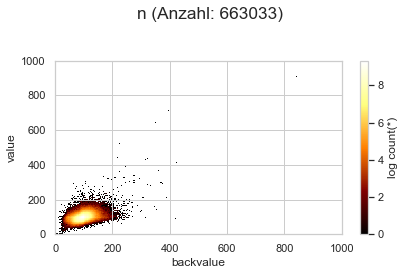

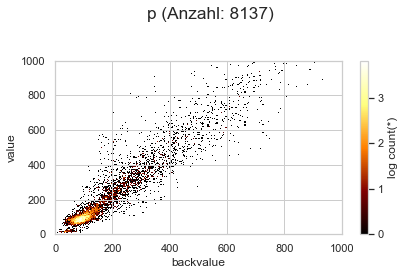

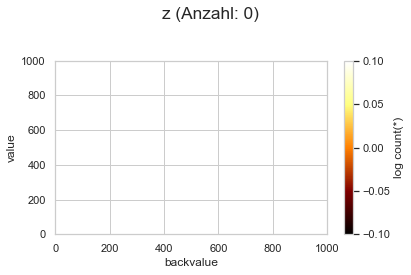

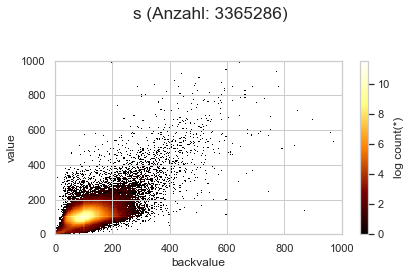

Benötigte Systemzeit: 1.168s


In [8]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

# n_plot
n.plot(n.backvalue,
       n.value,
       limits=[[0, 1000],
               [0, 1000]],
       f='log',
       title='n (Anzahl: '+ str( len(our_n) ) + ')'
      )
#plt.title('n (Anzahl: '+ str( len(our_n) ) + ')')
plt.show()

# p_plot
p.plot(p.backvalue,
       p.value,
       limits=[[0, 1000],
               [0, 1000]],
       f='log',
       title='p (Anzahl: '+ str( len(our_p) ) + ')'
      )
#plt.title('p (Anzahl: '+ str( len(our_p) ) + ')')
plt.show()

# z_plot
z.plot(z.backvalue,
       z.value,
       limits=[[0, 1000],
               [0, 1000]],
       f='log',
       title='z (Anzahl: '+ str( len(our_z) ) + ')'
      )
#plt.title('z (Anzahl: '+ str( len(our_z) ) + ')')
plt.show()

# s_plot
s.plot(s.backvalue,
       s.value,
       limits=[[0, 1000],
               [0, 1000]],
       f='log',
       title='s (Anzahl: '+ str( len(our_s) ) + ')'
      )
#plt.title('s (Anzahl: '+ str( len(our_s) ) + ')')


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))

/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')
/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')
/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/utils.py:650: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(a)
/Users/samel/miniconda3/envs/Projekt_zur_Datenanalyse/lib/python3.8/site-packages/vaex/utils.py:651: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(a)
/Users/samel/miniconda3/envs

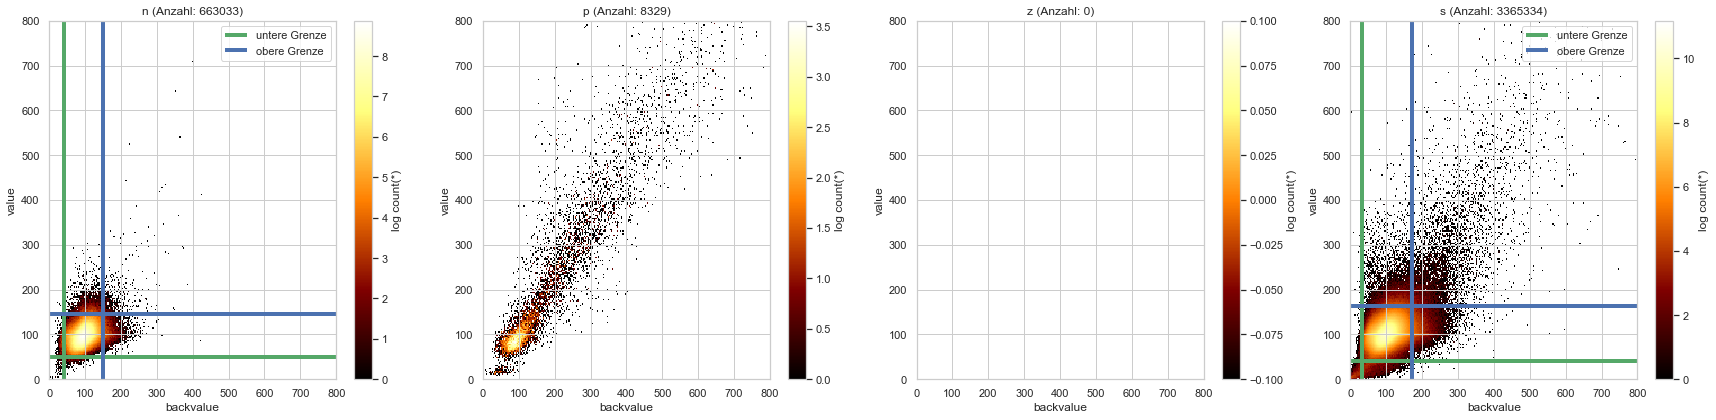

Benötigte Systemzeit: 3.021s


In [16]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n.plot(n.backvalue,
       n.value,
       #what=np.log(vaex.stat.count(n_cleaned_scaled.value)),
       limits=[[0, 800],
               [0, 800]],
       f='log'
      )
plt.title('n (Anzahl: '+ str( len(n) ) + ')')

plt.vlines(n_3_BackvalueGrenzen[0], 0, 800, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_3_ValueGrenzen[0], 0, 800, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(n_3_BackvalueGrenzen[1], 0, 800, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(n_3_ValueGrenzen[1], 0, 800, linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.sca(ax2)
# code für 2te heatmap
p.plot(p.backvalue,
       p.value,
       #what=np.log(vaex.stat.count(p_cleaned_scaled.value)),
       limits=[[0, 800],
               [0, 800]],
       f='log'
      )
plt.title('p (Anzahl: '+ str( len(p) ) + ')')
#plt.vlines(p_BackvalueGrenzen[1], 0, 800, linestyles ="solid", colors ="b")
#plt.hlines(p_ValueGrenzen[1], 0, 800, linestyles ="solid", colors ="b")


plt.sca(ax3)
# code für 3te heatmap
z.plot(z.backvalue,
       z.value,
       #what=np.log(vaex.stat.count(z_cleaned_scaled.value)),
       limits=[[0, 800],
               [0, 800]], 
       f='log'
      )
plt.title('z (Anzahl: '+ str( len(z) ) + ')')
#plt.vlines(z_BackvalueGrenzen[1], 0, 800, linestyles ="solid", colors ="k")
#plt.hlines(n_ValueGrenzen[1], 0, 800, linestyles ="solid", colors ="b")


plt.sca(ax4)
# code für 4te heatmap
s.plot(s.backvalue,
       s.value,
       #what=np.log(vaex.stat.count(s_cleaned_scaled.value)),
       limits=[[0, 800],
               [0, 800]],
       f='log'
      )
plt.title('s (Anzahl: '+ str( len(s) ) + ')')

plt.vlines(s_3_BackvalueGrenzen[0], 0, 800, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_3_ValueGrenzen[0], 0, 800, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(s_3_BackvalueGrenzen[1], 0, 800, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(s_3_ValueGrenzen[1], 0, 800, linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


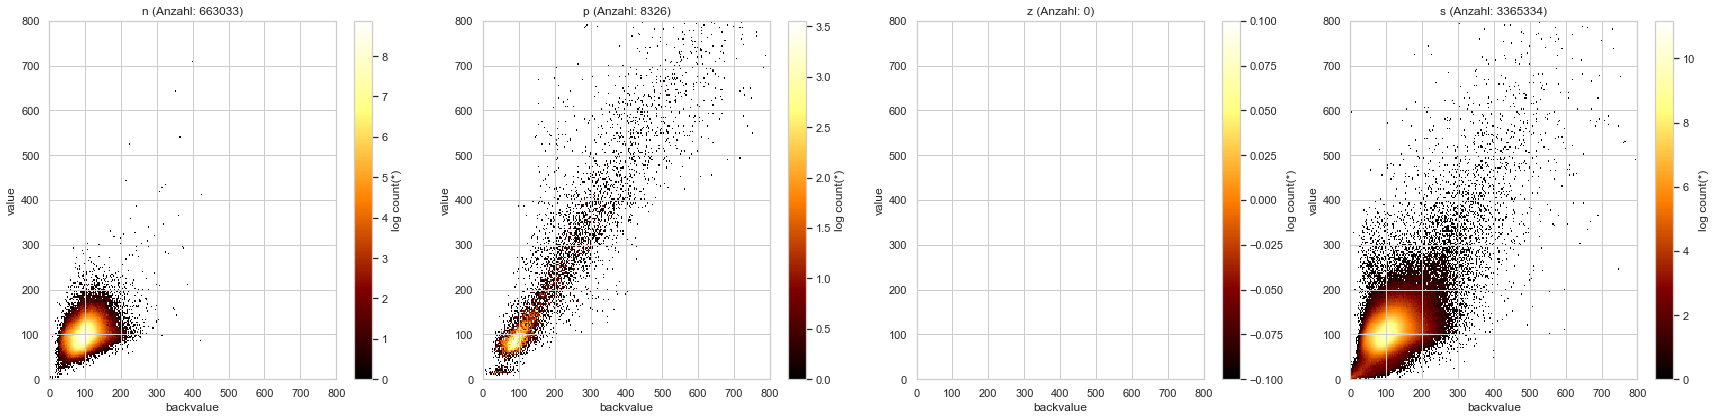

Benötigte Systemzeit: 8.195s


In [17]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n_scaled.plot(n_scaled.backvalue,
              n_scaled.value,
              #what=np.log(vaex.stat.count(n_cleaned_scaled.value)),
              limits=[[0, 800],
                      [0, 800]],
              f='log'
             )
plt.title('n (Anzahl: '+ str( len(n_scaled) ) + ')')


plt.sca(ax2)
# code für 2te heatmap
p_scaled.plot(p_scaled.backvalue,
              p_scaled.value,
              #what=np.log(vaex.stat.count(p_cleaned_scaled.value)),
              limits=[[0, 800],
                      [0, 800]],
              f='log'
             )
plt.title('p (Anzahl: '+ str( len(p_scaled) ) + ')')


plt.sca(ax3)
# code für 3te heatmap
z_scaled.plot(z_scaled.backvalue,
              z_scaled.value,
              #what=np.log(vaex.stat.count(z_cleaned_scaled.value)),
              limits=[[0, 800],
                      [0, 800]],
              f='log'
             )
plt.title('z (Anzahl: '+ str( len(z_scaled) ) + ')')


plt.sca(ax4)
# code für 4te heatmap
s_scaled.plot(s_scaled.backvalue,
              s_scaled.value,
              #what=np.log(vaex.stat.count(s_cleaned_scaled.value)),
              limits=[[0, 800],
                      [0, 800]],
              f='log'
             )
plt.title('s (Anzahl: '+ str( len(s_scaled) ) + ')')


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


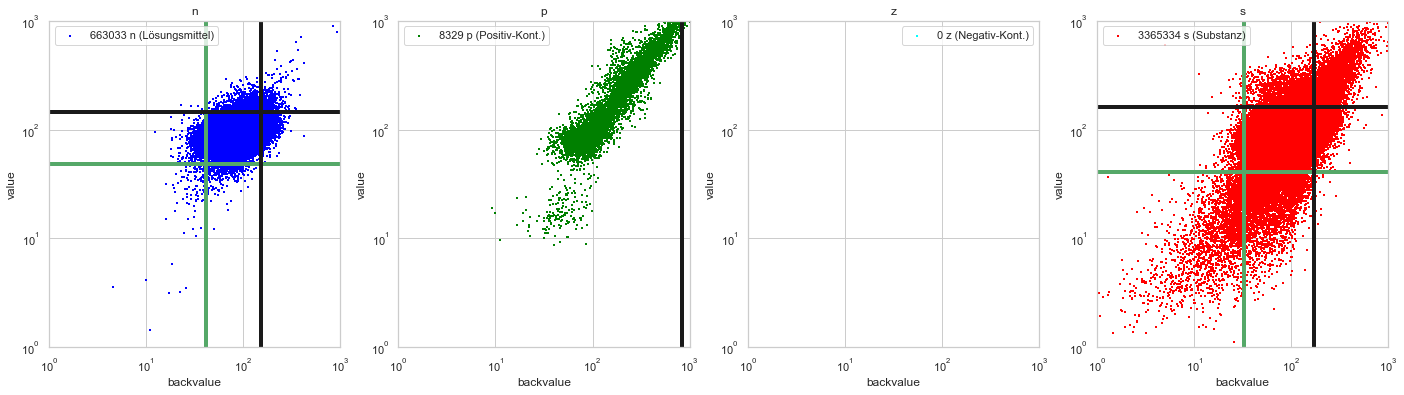

Benötigte Systemzeit: 31.682s


In [18]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
plt.scatter(n.backvalue.values,
            n.value.values,
            8,
            marker='+',
            color='blue',
            label=str(len(n))+' n (Lösungsmittel)',
            alpha=1
           )
plt.xlim(1, 1000)
plt.ylim(1, 1000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('n')

plt.vlines(n_3_BackvalueGrenzen[0], 0, 1000, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_3_ValueGrenzen[0], 0, 1000, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(n_3_BackvalueGrenzen[1], 0, 1000, linestyles ="solid", colors ="k", linewidth=4, label="obere Grenze")
plt.hlines(n_3_ValueGrenzen[1], 0, 1000, linestyles ="solid", colors ="k", linewidth=4)


plt.sca(ax2)
# code für 2te heatmap
plt.scatter(p.backvalue.values,
            p.value.values,
            8,
            marker='+',
            color='green',
            label=str(len(p))+' p (Positiv-Kont.)',
            alpha=1
           )
plt.xlim(1, 1000)
plt.ylim(1, 1000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('p')
plt.vlines(p_3_BackvalueGrenzen[1], 0, 1000, linestyles ="solid", colors ="k", linewidth=4, label="obere Grenze")



plt.sca(ax3)
# code für 3te heatmap
plt.scatter(z.backvalue.values,
            z.value.values,
            8,
            marker='+',
            color='cyan',
            label=str(len(z))+' z (Negativ-Kont.)',
            alpha=1
           )
plt.xlim(1, 1000)
plt.ylim(1, 1000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('z')



plt.sca(ax4)
# code für 4te heatmap
plt.scatter(s.backvalue.values,
            s.value.values,
            8,
            marker='+',
            color='red',
            label=str(len(s))+' s (Substanz)',
            alpha=1
           )
plt.xlim(1, 1000)
plt.ylim(1, 1000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('s')

plt.vlines(s_3_BackvalueGrenzen[0], 0, 1000, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_3_ValueGrenzen[0], 0, 1000, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(s_3_BackvalueGrenzen[1], 0, 1000, linestyles ="solid", colors ="k", linewidth=4, label="obere Grenze")
plt.hlines(s_3_ValueGrenzen[1], 0, 1000, linestyles ="solid", colors ="k", linewidth=4)


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


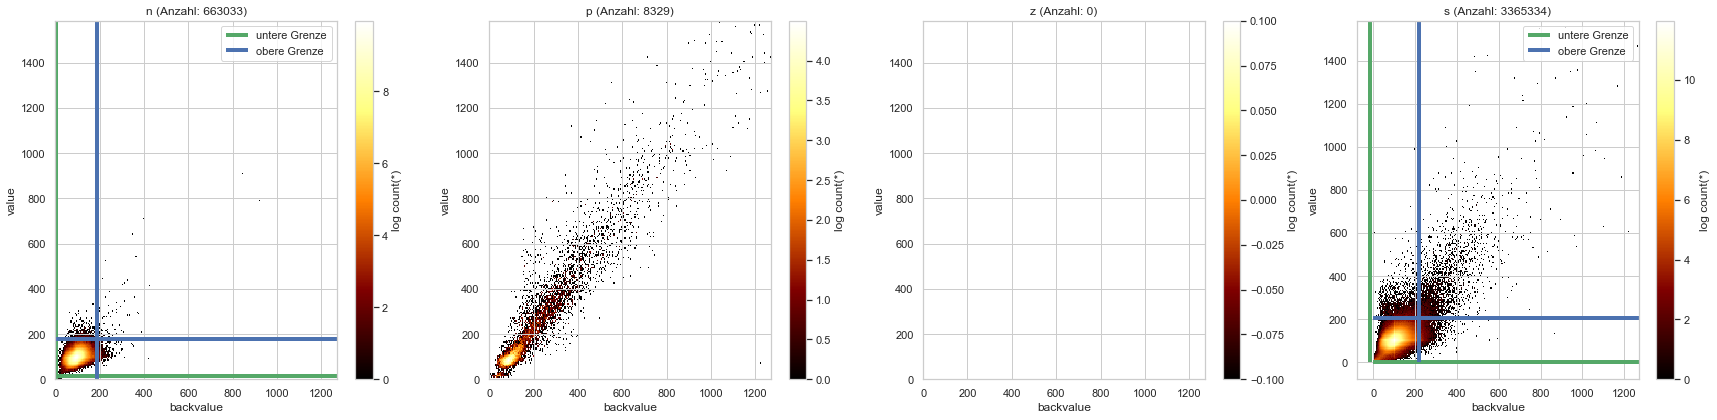

Benötigte Systemzeit: 1.552s


In [25]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n.plot(n.backvalue,
       n.value,
       #what=np.log(vaex.stat.count(n_cleaned_scaled.value)),
       limits=[[0, p_5_BackvalueGrenzen[1]],
               [0, p_5_ValueGrenzen[1]]],
       f='log'
      )
plt.title('n (Anzahl: '+ str( len(n) ) + ')')

plt.vlines(n_5_BackvalueGrenzen[0], 0, p_5_ValueGrenzen[1], linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_5_ValueGrenzen[0], 0, p_5_BackvalueGrenzen[1], linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(n_5_BackvalueGrenzen[1], 0, p_5_ValueGrenzen[1], linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(n_5_ValueGrenzen[1], 0, p_5_BackvalueGrenzen[1], linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.sca(ax2)
# code für 2te heatmap
p.plot(p.backvalue,
       p.value,
       #what=np.log(vaex.stat.count(p_cleaned_scaled.value)),
       limits=[[0, p_5_BackvalueGrenzen[1]],
               [0, p_5_ValueGrenzen[1]]],
       f='log'
      )
plt.title('p (Anzahl: '+ str( len(p) ) + ')')
#plt.vlines(p_BackvalueGrenzen[1], 0, 800, linestyles ="solid", colors ="b")
#plt.hlines(p_ValueGrenzen[1], 0, 800, linestyles ="solid", colors ="b")


plt.sca(ax3)
# code für 3te heatmap
z.plot(z.backvalue,
       z.value,
       #what=np.log(vaex.stat.count(z_cleaned_scaled.value)),
       limits=[[0, p_5_BackvalueGrenzen[1]],
               [0, p_5_ValueGrenzen[1]]],
       f='log'
      )
plt.title('z (Anzahl: '+ str( len(z) ) + ')')
#plt.vlines(z_BackvalueGrenzen[1], 0, 800, linestyles ="solid", colors ="k")
#plt.hlines(n_ValueGrenzen[1], 0, 800, linestyles ="solid", colors ="b")


plt.sca(ax4)
# code für 4te heatmap
s.plot(s.backvalue,
       s.value,
       #what=np.log(vaex.stat.count(s_cleaned_scaled.value)),
       limits=[[0, p_5_BackvalueGrenzen[1]],
               [0, p_5_ValueGrenzen[1]]],
       f='log'
      )
plt.title('s (Anzahl: '+ str( len(s) ) + ')')

plt.vlines(s_5_BackvalueGrenzen[0], 0, p_5_ValueGrenzen[1], linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_5_ValueGrenzen[0], 0, p_5_BackvalueGrenzen[1], linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(s_5_BackvalueGrenzen[1], 0, p_5_ValueGrenzen[1], linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(s_5_ValueGrenzen[1], 0, p_5_BackvalueGrenzen[1], linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


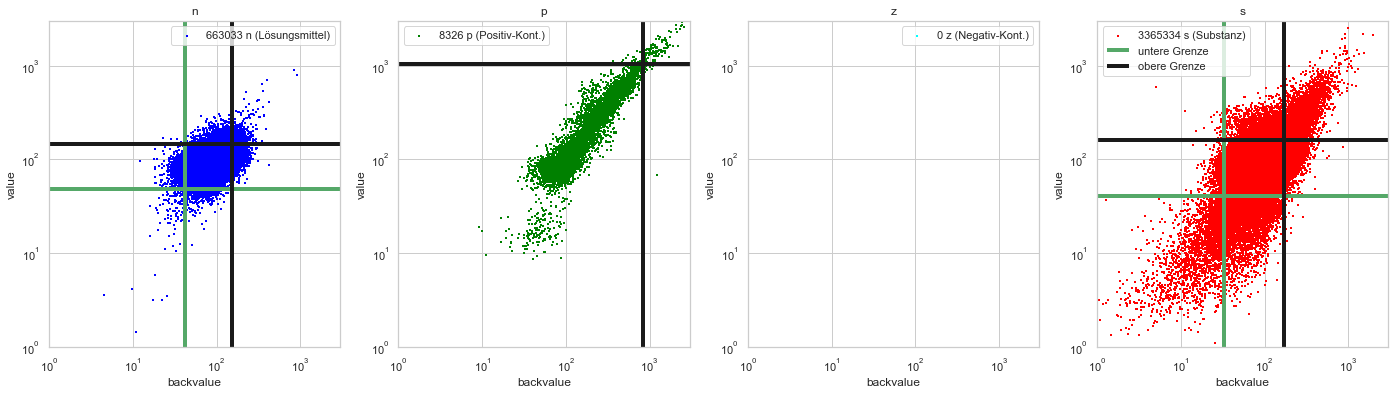

Benötigte Systemzeit: 30.172s


In [21]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
plt.scatter(n_scaled.backvalue.values,
            n_scaled.value.values,
            8,
            marker='+',
            color='blue',
            label=str(len(n_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
plt.xlim(1, 3000)
plt.ylim(1, 3000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('n')

plt.vlines(n_3_BackvalueGrenzen[0], 0, 3000, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_3_ValueGrenzen[0], 0, 3000, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(n_3_BackvalueGrenzen[1], 0, 3000, linestyles ="solid", colors ="k", linewidth=4, label="obere Grenze")
plt.hlines(n_3_ValueGrenzen[1], 0, 3000, linestyles ="solid", colors ="k", linewidth=4)


plt.sca(ax2)
# code für 2te heatmap
plt.scatter(p_scaled.backvalue.values,
            p_scaled.value.values,
            8,
            marker='+',
            color='green',
            label=str(len(p_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
plt.xlim(1, 3000)
plt.ylim(1, 3000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('p')
plt.vlines(p_3_BackvalueGrenzen[1], 0, 3000, linestyles ="solid", colors ="k", linewidth=4, label="obere Grenze")
plt.hlines(p_3_ValueGrenzen[1], 0, 3000, linestyles ="solid", colors ="k", linewidth=4)



plt.sca(ax3)
# code für 3te heatmap
plt.scatter(z_scaled.backvalue.values,
            z_scaled.value.values,
            8,
            marker='+',
            color='cyan',
            label=str(len(z_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
plt.xlim(1, 3000)
plt.ylim(1, 3000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('z')



plt.sca(ax4)
# code für 4te heatmap
plt.scatter(s_scaled.backvalue.values,
            s_scaled.value.values,
            8,
            marker='+',
            color='red',
            label=str(len(s_scaled))+' s (Substanz)',
            alpha=1
           )
plt.xlim(1, 3000)
plt.ylim(1, 3000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('s')

plt.vlines(s_3_BackvalueGrenzen[0], 0, 3000, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_3_ValueGrenzen[0], 0, 3000, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(s_3_BackvalueGrenzen[1], 0, 3000, linestyles ="solid", colors ="k", linewidth=4, label="obere Grenze")
plt.hlines(s_3_ValueGrenzen[1], 0, 3000, linestyles ="solid", colors ="k", linewidth=4)
plt.legend()


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))



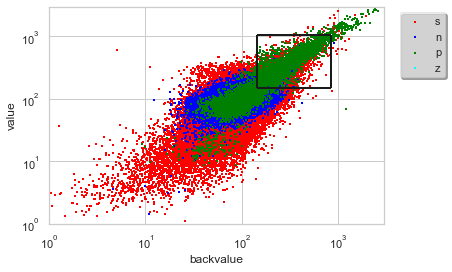

Benötigte Systemzeit: 21.565s


In [89]:
start_proc = time.process_time()
fig = plt.figure()
sns.set_theme(style="whitegrid")

ax1 = plt.gca()
ax1.scatter(s_scaled.backvalue.values,
            s_scaled.value.values,
            4,
            marker="+",
            color='red',
            label='s',
            alpha=1
           )
ax1.set_xlim(1, 3000)
ax1.set_ylim(1, 3000)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')
#ax1.legend('s')



ax2 = plt.gca()
ax2.scatter(n_scaled.backvalue.values,
            n_scaled.value.values,
            4,
            marker="+",
            color='blue',
            label='n',
            alpha=1
           )
ax2.set_xlim(1, 3000)
ax2.set_ylim(1, 3000)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')
#ax2.legend('n')



ax3 = plt.gca()
ax3.scatter(p_scaled.backvalue.values,
            p_scaled.value.values,
            4,
            marker="+",
            color='green',
            label='p',
            alpha=1
           )
ax3.set_xlim(1, 3000)
ax3.set_ylim(1, 3000)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')
#ax3.legend('p')



ax4 = plt.gca()
ax4.scatter(z_scaled.backvalue.values,
            z_scaled.value.values,
            4,
            marker="+",
            color='cyan',
            label='z',
            alpha=1
           )
ax4.set_xlim(1, 3000)
ax4.set_ylim(1, 3000)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')
#ax4.legend('z')

#legend((ax1, ax2, ax3, ax4), ('s', 'n', 'p', 'z'))
leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

ax5 = plt.gca()
ax5.vlines(p_3_BackvalueGrenzen[1], n_3_BackvalueGrenzen[1], p_3_ValueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2, label="Positvkontrollen")
ax6 = plt.gca()
ax6.hlines(p_3_ValueGrenzen[1], n_3_ValueGrenzen[1], p_3_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

ax7 = plt.gca()
ax7.vlines(n_3_ValueGrenzen[1], n_3_BackvalueGrenzen[1], p_3_ValueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)
ax8 = plt.gca()
ax8.hlines(n_3_BackvalueGrenzen[1], n_3_ValueGrenzen[1], p_3_BackvalueGrenzen[1], linestyles ="solid", colors ="k", linewidth=2)

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


In [18]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [19]:
df_copy = df_cleaned_scaled.to_copy(column_names=('value', 'backvalue'))
df_numpy = df_copy.values


In [22]:
start_proc = time.process_time()

fcm = FCM(n_clusters=3)
fcm.fit(df_numpy)

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


Benötigte Systemzeit: 69.800s


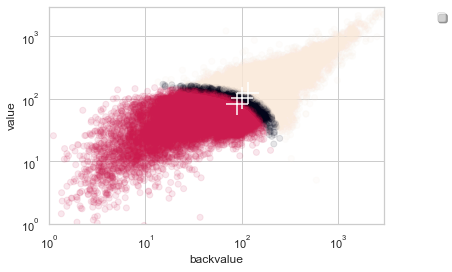

Benötigte Systemzeit: 81.441s


In [23]:
start_proc = time.process_time()

fig = plt.figure()
sns.set_theme(style="whitegrid")

ax1 = plt.gca()

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(df_numpy)

# plot result
#f, axes = plt.subplots(1, 2, figsize=(11,5))
#axes[0].scatter(X[:,0], X[:,1], alpha=.1)
ax1.scatter(df_numpy[:,0], df_numpy[:,1], c=fcm_labels, alpha=.1)
ax1.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')

ax1.set_xlim(1, 3000)
ax1.set_ylim(1, 3000)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')

leg = plt.legend(loc='best', bbox_to_anchor=(1.2, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))